https://github.com/ibm-watson-data-lab/pixiedust/wiki/Tutorial:-Using-Notebooks-with-PixieDust-for-Fast,-Flexible,-and-Easier-Data-Analysis-and-Experimentation

In [ ]:
#!pip install --user -U pixiedust requests matplotlib
import pixiedust

inspections = pixiedust.sampleData("https://opendata.lasvegasnevada.gov/resource/86jg-3buh.csv")

In [ ]:
display(inspections)

In [ ]:
!pip install --user -U pymongo==2.8

In [31]:
#!conda install -y pymongo
import pymongo as pm
from pymongo.errors import ConnectionFailure
from time import sleep
from ssl import CERT_NONE
import pixiedust


client = pm.MongoClient('10.210.9.130', ssl=True, ssl_cert_reqs=CERT_NONE,
                        username='strands', authSource='admin', authMechanism='SCRAM-SHA-1',
                        serverSelectionTimeoutMS=1500, password='Grum#Beere')
#client = pm.MongoClient('lcas.lincoln.ac.uk', port=80)
#try:
   # The ismaster command is cheap and does not require auth.


collection = client.aafy4_message_store.nav_stats
#display(collection.find())
c= collection.find({'final_node': 'ChargingPoint'}).limit(1000)
#except ConnectionFailure as e:
#   print("Server not available %s" % str(e))


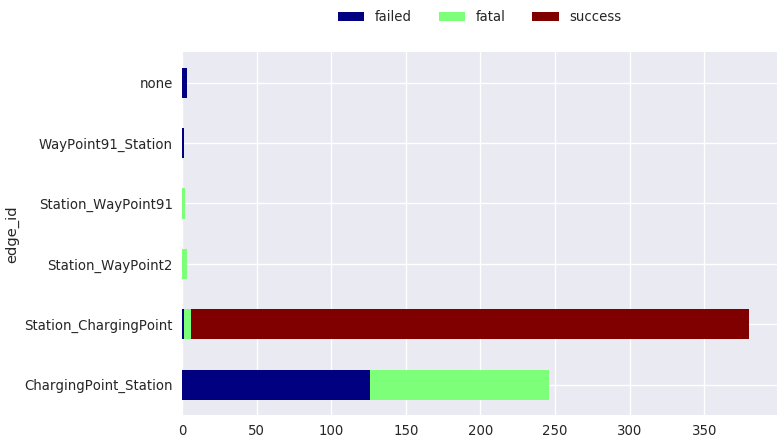

In [32]:
items=[i for i in c]
display(items)
#for i in c:
#    display(i)